In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio 
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.signal import lfilter, filtfilt ,freqz, firwin, freqz

In [19]:
# Load the Drone audio file
audio_file = './sound/Drone.wav'  # Replace with your audio file path
y, fs = librosa.load(audio_file)  # , duration=20)

LimitIndex = fs
y = y[:LimitIndex]

# normalize audio  
max_value = np.max(np.abs(y))       # Determine the maximum values
audio_Drone = y/max_value        # Use max_value and normalize sound data to get values between -1 & +1

timesDuration = librosa.get_duration(y=audio_Drone, sr=fs)

print(f'Sampling Rate: {fs} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

Sampling Rate: 22050 Hz
Audio Duration: 1 seconds


In [20]:
# Load the NoDrone audio file
audio_file = './sound/NoDrone.wav'  # Replace with your audio file path
y, fs = librosa.load(audio_file)  # , duration=20)

y = y[:LimitIndex]

# normalize audio  
max_value = np.max(np.abs(y))       # Determine the maximum values
audio_NoDrone = y/max_value        # Use max_value and normalize sound data to get values between -1 & +1

timesDuration = librosa.get_duration(y=audio_NoDrone, sr=fs)

print(f'Sampling Rate: {fs} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')


Sampling Rate: 22050 Hz
Audio Duration: 1 seconds


# Spectrogram Function
Calculate Spectrogram by using SFTF method

In [21]:
# Calculate Spectrogram by using SFTF method
def spectrogram_cal(data,fs):
    ms = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=2048, hop_length=128, n_mels=256)
    spectrogram_db = librosa.power_to_db(ms, ref=np.max)

    # n_fft = 1024       # Length of FFT window
    # hop_length = 64   # Number of samples between frames
    # win_length = 1024  # Length of the window
    # window = 'hann'    # Windowing function

    # # Compute the STFT
    # spectrogram = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
    # spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))  # Convert to dB
    
    return spectrogram_db

# FFT Calcutor Function
1-D discrete Fourier transforms 

In [22]:
# ----- 1-D discrete Fourier transforms ------
def audioFFT_cal (data,fs):
    N = int(fs * timesDuration)         #   Number of sample points

    #yf = fft(audio_DroneFilter)
    #xf = fftfreq(N, 1 / fs)

    T = 1.0 / (fs)   # sample spacing
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(data)
    Xf = fftfreq(N, T)[:N//2]
    FFT_Amplitude = 10*np.log(np.abs(yf[0:N//2]))
    #20*np.log10(np.abs(h))
    #max_freq = np.argmax(N * np.abs(yf[0:N//2]))
    #print("High Amplitude Frequency :", max_freq)
    
    return Xf,FFT_Amplitude

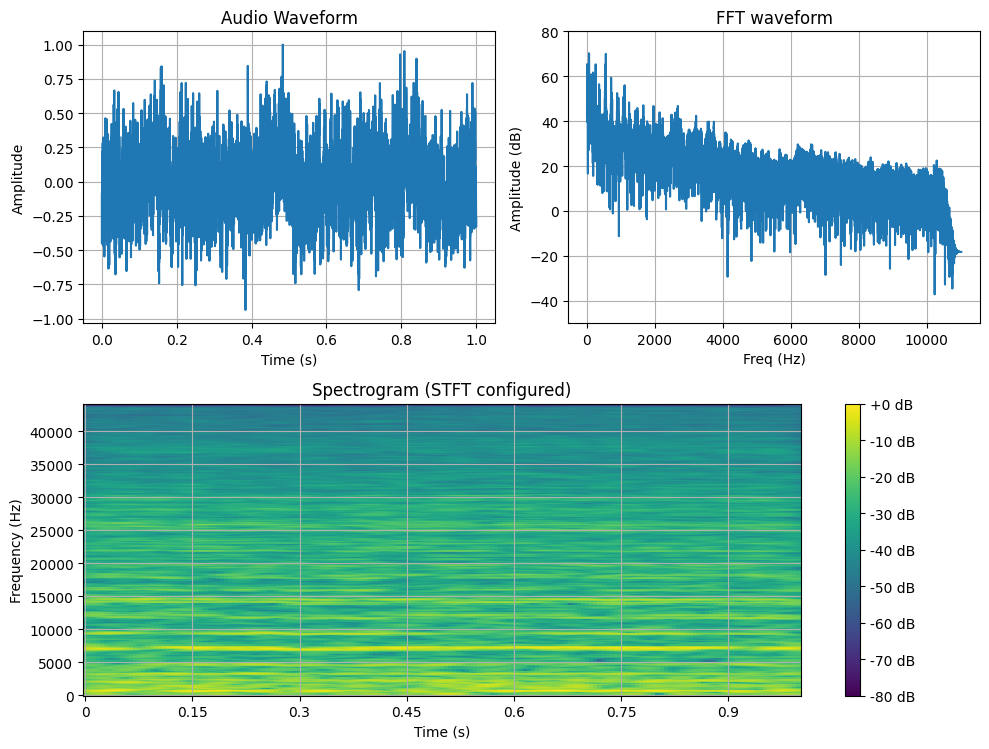

In [23]:
y_signal = audio_Drone

plt.figure(figsize=(10, 8))

# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y_signal) / fs, len(y_signal)), y_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y_signal,fs)    
plt.subplot(2, 2, 2)
plt.title(f'FFT waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.ylim(-50,80)

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y_signal,fs)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT configured)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

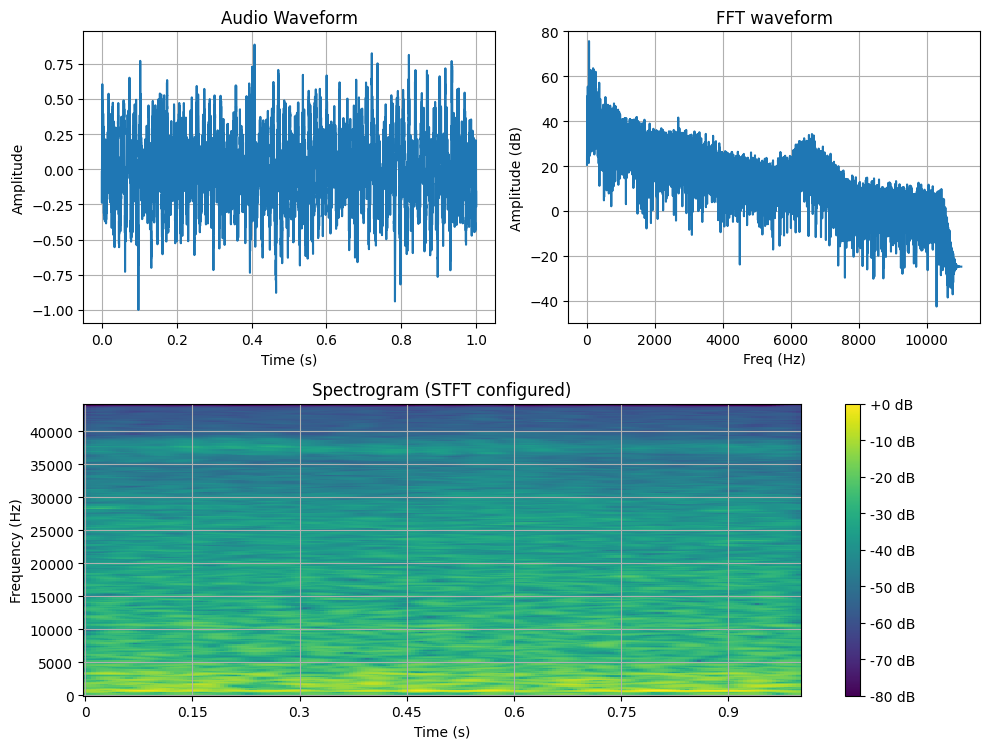

In [24]:
y_signal = audio_NoDrone

plt.figure(figsize=(10, 8))

# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y_signal) / fs, len(y_signal)), y_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y_signal,fs)    
plt.subplot(2, 2, 2)
plt.title(f'FFT waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.ylim(-50,80)

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y_signal,fs)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT configured)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

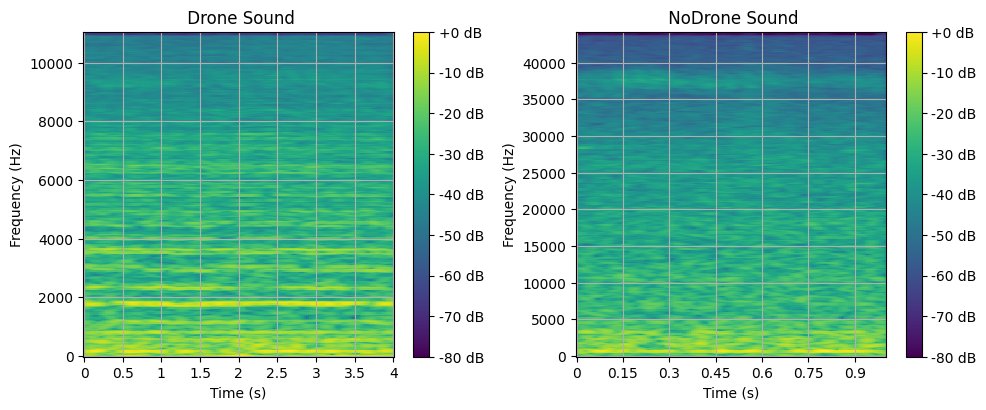

In [25]:
# ------- Plot Spectrogram ---------
spectrogram_Drone = spectrogram_cal(audio_Drone,fs)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)

librosa.display.specshow(spectrogram_Drone, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' Drone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

spectrogram_db = spectrogram_cal(audio_NoDrone,fs)
plt.subplot(2, 2, 2)
librosa.display.specshow(spectrogram_db, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' NoDrone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Audio Filter Function
using High Pass and Band Pass Filter

In [26]:
# Audio High Pass Filter using Rectangular window method
# window type: blackman , rectangular, hamming
# fs = Sample rate, Hz
    
def initHPF(cutoff,fs):
    # cutoff = cutoff frequency, Hz
    numtaps = 401  # Size of the FIR filter
    taps = firwin(numtaps, cutoff, window='blackman', pass_zero=False, fs=fs)
    return taps

def initBPF(band,fs):
    #band = [200, 400]  # Desired band-pass range, Hz
    numtaps = 401           # Size of the FIR filter
    taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

    return taps

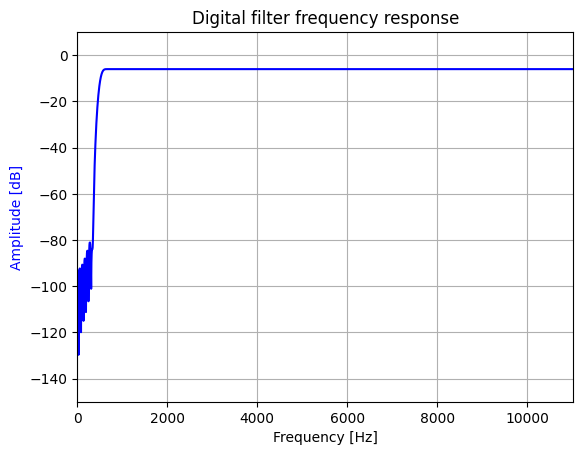

In [27]:
# Compute and plot the frequency response of the filter
cutoff_freq = 500
HPF_Cof = initHPF(cutoff_freq,fs)
w, h = freqz(HPF_Cof, 2, worN=2000)

# Lowcut = 1000
# Highcut = 6000
# BPF_Cof = initBPF([Lowcut,Highcut],fs)
# w, h = freqz(BPF_Cof, 1, worN=2000)

# Plot the frequency response
plt.figure()
plt.title('Digital filter frequency response')
plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [Hz]')
plt.ylim([-150, 10])
plt.xlim([0, 0.5*fs])
plt.grid()

plt.show()

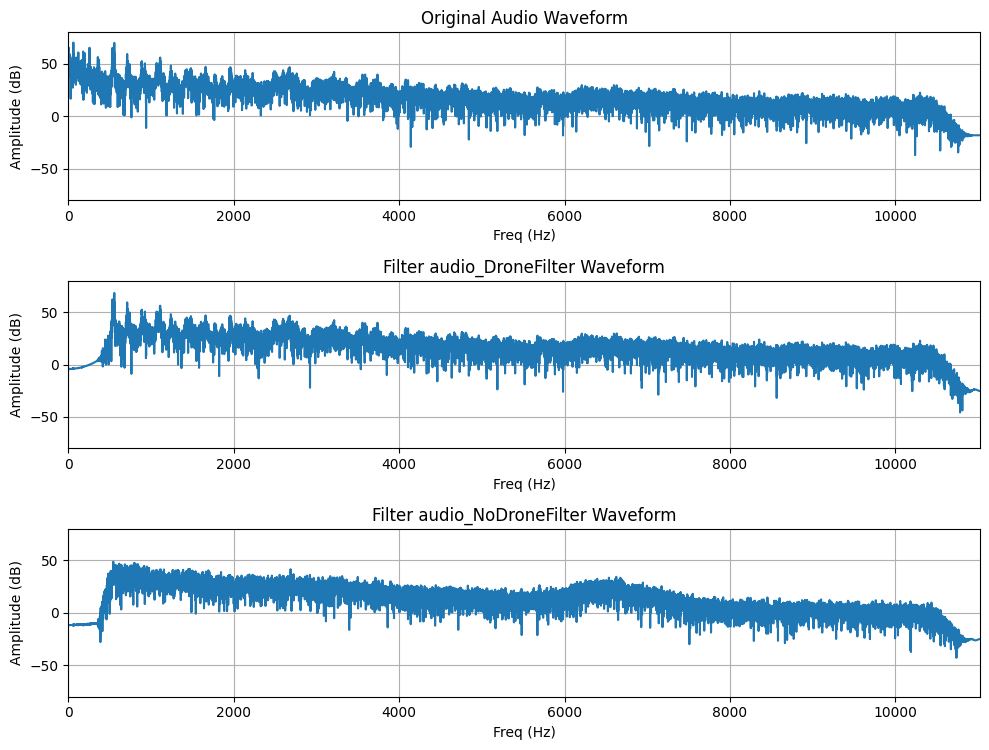

In [28]:
audio_DroneFilter = lfilter(HPF_Cof, 1, audio_Drone)
audio_NoDroneFilter = lfilter(HPF_Cof, 1, audio_NoDrone)

plt.figure(figsize=(10, 8))

# ----- Plot Audio Waveform  -----
xf,yf = audioFFT_cal(audio_Drone,fs)  
plt.subplot(3, 1, 1)
plt.title(f'Original Audio Waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0,fs/2)
plt.ylim(-80,80)

# ----- Plot FFT  -----
xf_filter,yf_filter = audioFFT_cal(audio_DroneFilter,fs)    
plt.subplot(3, 1, 2)
plt.title(f'Filter audio_DroneFilter Waveform')
plt.plot(xf_filter, yf_filter)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0,fs/2)
plt.ylim(-80,80)

xf_filter,yf_filter = audioFFT_cal(audio_NoDroneFilter,fs)    
plt.subplot(3, 1, 3)
plt.title(f'Filter audio_NoDroneFilter Waveform')
plt.plot(xf_filter, yf_filter)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0,fs/2)
plt.ylim(-80,80)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

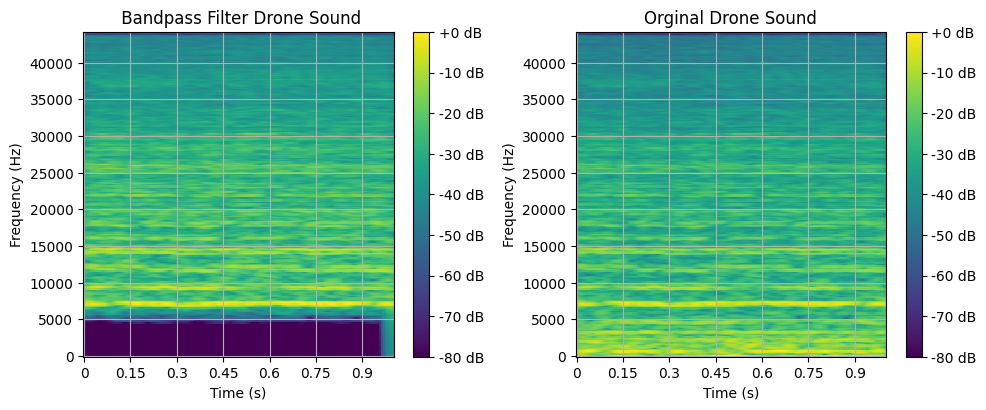

In [29]:
# ------- Plot Spectrogram ---------
spectrogram_Drone = spectrogram_cal(audio_DroneFilter,fs)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)

librosa.display.specshow(spectrogram_Drone, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' Bandpass Filter Drone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

spectrogram_NoDrone = spectrogram_cal(audio_Drone,fs)
plt.subplot(2, 2, 2)
librosa.display.specshow(spectrogram_NoDrone, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f'Orginal Drone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Noise reduction in python using spectral gating

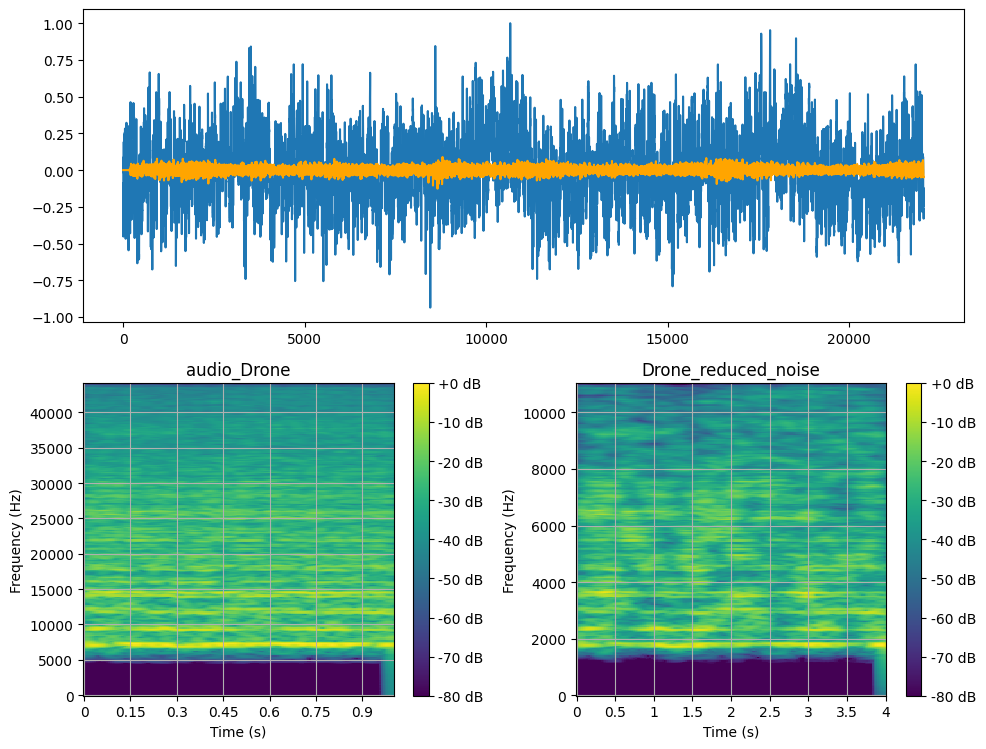

In [30]:
import noisereduce as nr

stationary=True
prop_decrease=1
n_std_thresh_stationary = 1

# perform noise reduction
Drone_reduced_noise = nr.reduce_noise(y=audio_DroneFilter, 
                                      sr=fs, 
                                      stationary=stationary, 
                                      prop_decrease=prop_decrease,
                                      n_std_thresh_stationary=n_std_thresh_stationary)    # ,use_torch=True )

No_Drone_reduced_noise = nr.reduce_noise(y=audio_NoDroneFilter, 
                                         sr=fs, 
                                         stationary=stationary, 
                                         prop_decrease=prop_decrease,
                                         n_std_thresh_stationary=n_std_thresh_stationary)     # ,use_torch=True )

# plot graph Drone_reduced_noise
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(audio_Drone)
plt.plot(Drone_reduced_noise,'orange')

plt.subplot(2, 2, 3)
spectrogram_db = spectrogram_cal(audio_DroneFilter,fs)
librosa.display.specshow(spectrogram_db, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(f'audio_Drone')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.subplot(2, 2, 4)
spectrogram_db = spectrogram_cal(Drone_reduced_noise,fs)
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Drone_reduced_noise')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

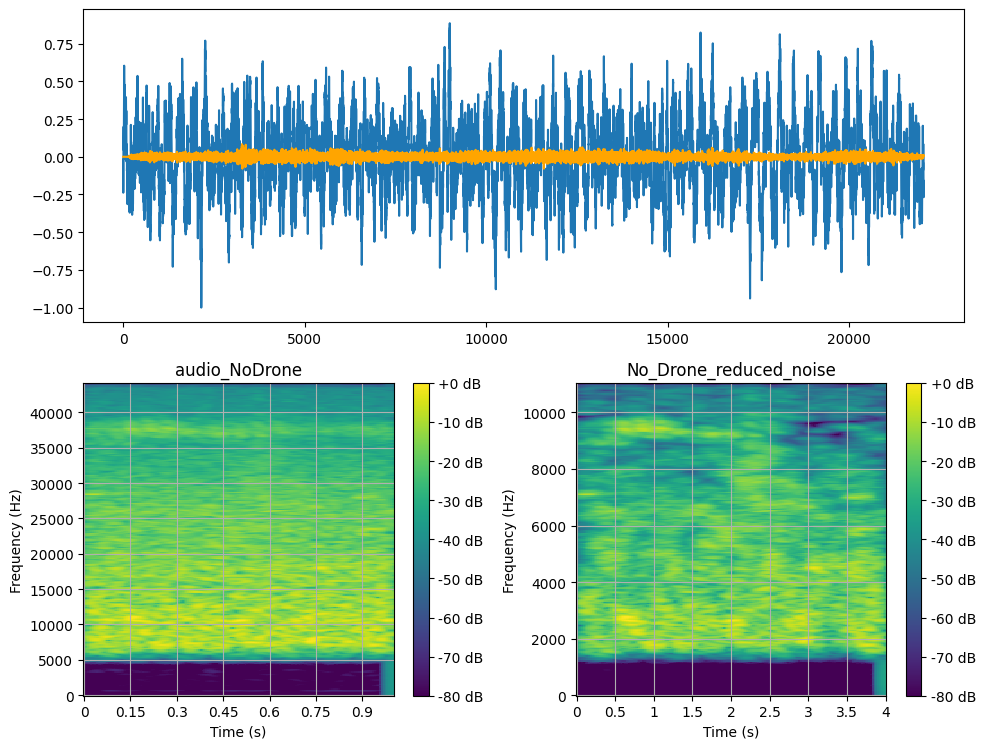

In [31]:
# plot graph No_Drone_reduced_noise
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(audio_NoDrone)
plt.plot(No_Drone_reduced_noise,'orange')

plt.subplot(2, 2, 3)
spectrogram_db = spectrogram_cal(audio_NoDroneFilter,fs)
librosa.display.specshow(spectrogram_db, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(f'audio_NoDrone')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.subplot(2, 2, 4)
spectrogram_db = spectrogram_cal(No_Drone_reduced_noise,fs)
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(f'No_Drone_reduced_noise')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

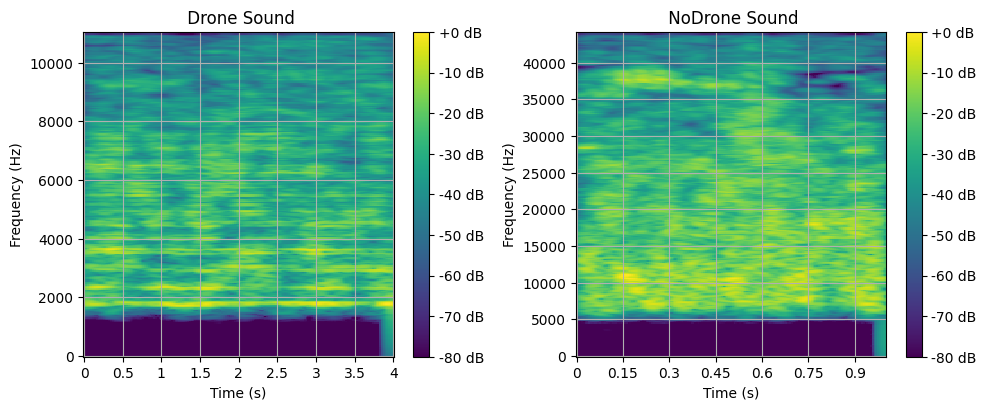

In [32]:
# ------- Plot Spectrogram ---------
spectrogram_Drone = spectrogram_cal(Drone_reduced_noise,fs)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)

librosa.display.specshow(spectrogram_Drone, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' Drone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

spectrogram_NoDrone = spectrogram_cal(No_Drone_reduced_noise,fs)
plt.subplot(2, 2, 2)
librosa.display.specshow(spectrogram_NoDrone, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' NoDrone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

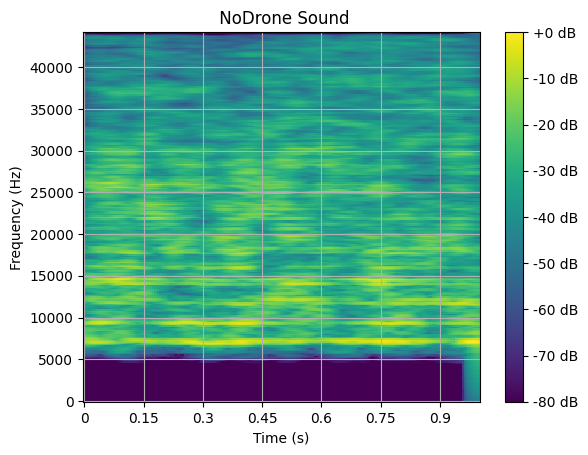

In [47]:
spectrogram_expo = spectrogram_cal(Drone_reduced_noise,fs)

plt.figure()
librosa.display.specshow(spectrogram_expo, sr=fs*4, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title(f' NoDrone Sound')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()


# Power Spectrum Density (PSD)
compare PSD between sound of Drone and NoDrone

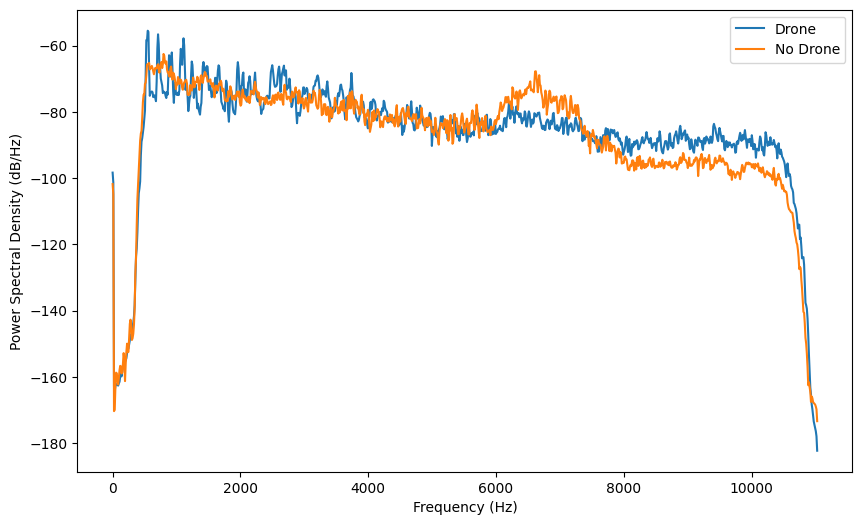

In [33]:
# Set the parameters for the PSD
NFFT = 2048
noverlap = NFFT // 2

# Compute the PSD of the audio signal
f_Drone, psd_Drone = signal.welch(Drone_reduced_noise, fs=fs, nperseg=NFFT, noverlap=noverlap)
f_NoDrone, psd_NoDrone = signal.welch(No_Drone_reduced_noise, fs=fs, nperseg=NFFT, noverlap=noverlap)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.plot(f_Drone, 10*np.log10(psd_Drone),label='Drone')
plt.plot(f_NoDrone, 10*np.log10(psd_NoDrone),label='No Drone')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.legend()
plt.show()

# Identify the noise frequencies
# threshold = np.mean(psd_NoDrone) + np.std(psd_NoDrone)
# noise_freqs = f[psd > threshold]
#print('Noise frequencies:', noise_freqs)

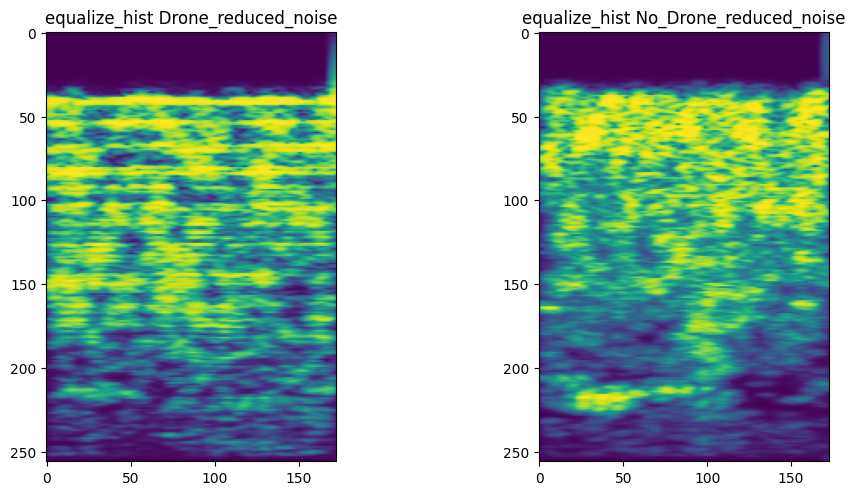

In [50]:
from skimage import exposure

spectrogram_Drone = spectrogram_cal(Drone_reduced_noise,fs) / 255.0
image_adapteq = exposure.equalize_hist((spectrogram_Drone))

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title('equalize_hist Drone_reduced_noise')
plt.imshow(image_adapteq)

spectrogram_Drone = spectrogram_cal(No_Drone_reduced_noise,fs) / 255.0
image_adapteq = exposure.equalize_hist((spectrogram_Drone))
plt.subplot(2,2,2)
plt.title('equalize_hist No_Drone_reduced_noise')
plt.imshow(image_adapteq)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()